# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
weather_api_key

'9482eb3311dac0183e96948743e52b42'

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    # print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()
       

# #         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

# #         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | ephrata
Processing Record 6 of Set 1 | rengo
Processing Record 7 of Set 1 | poxoreo
Processing Record 8 of Set 1 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 9 of Set 1 | minas de marcona
Processing Record 10 of Set 1 | svetlyy
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | alausi
Processing Record 14 of Set 1 | college
Processing Record 15 of Set 1 | labrador city
Processing Record 16 of Set 1 | kataba
Processing Record 17 of Set 1 | new plymouth
Processing Record 18 of Set 1 | marsh harbour
Processing Record 19 of Set 1 | huarmey
Processing Record 20 of Set 1 | puerto colombia
Processing Record 21 of Set 1 | bengkulu
Processing Record 22 of Set 1 | bethel


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
                                                

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,291.19,94,20,2.06,MG,1687894608
1,tiksi,71.6872,128.8694,282.35,64,99,4.15,RU,1687894608
2,waitangi,-43.9535,-176.5597,284.72,94,100,4.92,NZ,1687894608
3,west island,-12.1568,96.8225,299.14,78,40,6.17,CC,1687894608
4,ephrata,40.1798,-76.1788,299.96,83,40,3.60,US,1687894609


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,291.19,94,20,2.06,MG,1687894608
1,tiksi,71.6872,128.8694,282.35,64,99,4.15,RU,1687894608
2,waitangi,-43.9535,-176.5597,284.72,94,100,4.92,NZ,1687894608
3,west island,-12.1568,96.8225,299.14,78,40,6.17,CC,1687894608
4,ephrata,40.1798,-76.1788,299.96,83,40,3.60,US,1687894609


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

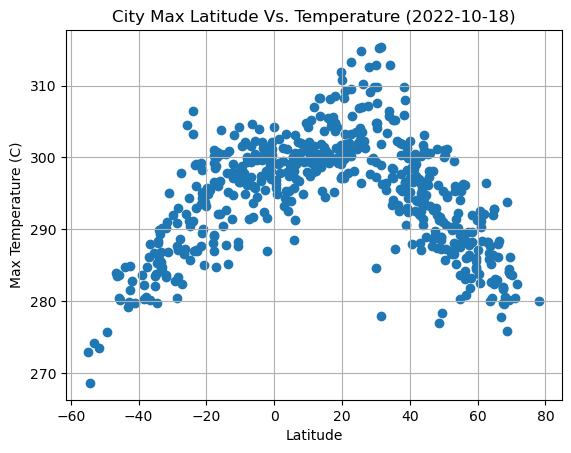

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.grid()
plt.title("City Max Latitude Vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

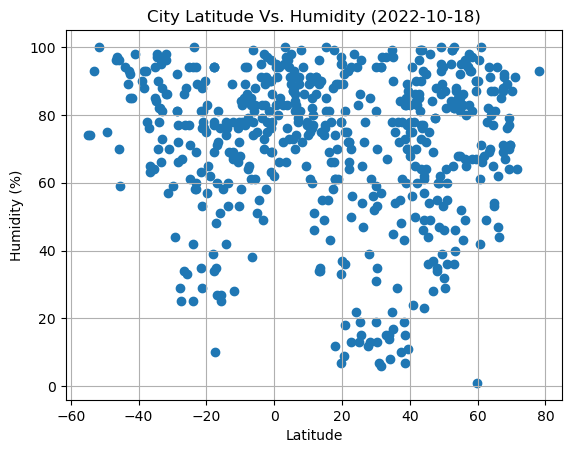

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

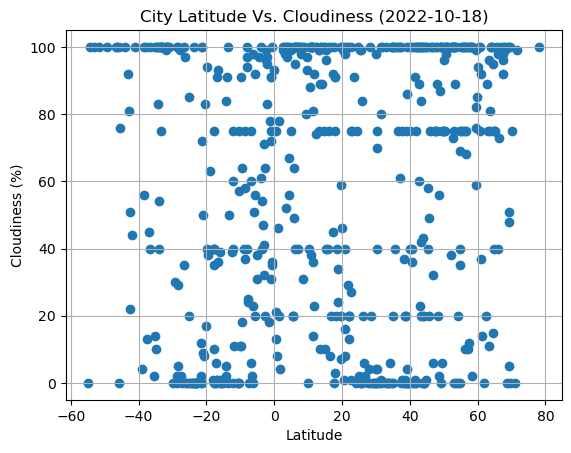

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

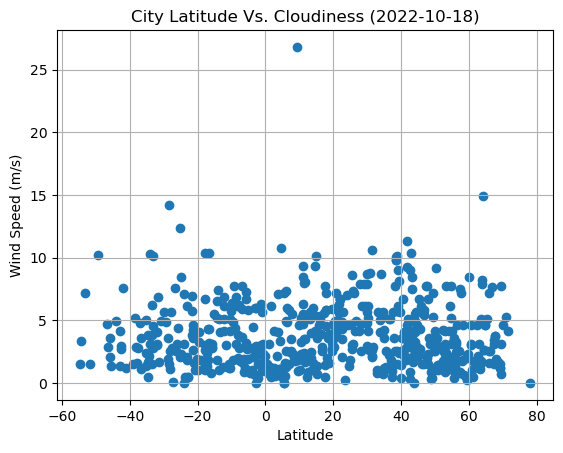

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude Vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
#Define a function to create Linear Regression plots


def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 2.581301099686561e-05


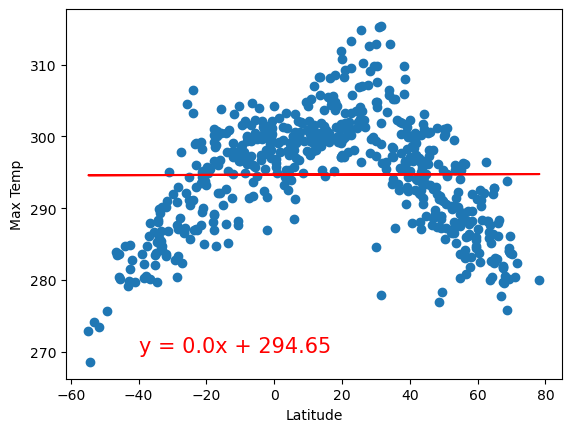

In [14]:
plot_linear_regression(city_data_df["Lat"], city_data_df["Max Temp"], "Max Temp", (-40,270))

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,282.35,64,99,4.15,RU,1687894608
4,ephrata,40.1798,-76.1788,299.96,83,40,3.60,US,1687894609
8,svetlyy,54.6750,20.1347,287.57,85,69,7.75,RU,1687894610
9,iqaluit,63.7506,-68.5145,280.00,70,75,5.14,CA,1687894611
12,college,64.8569,-147.8028,292.85,53,75,4.63,US,1687894611


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tolanaro,-25.0319,46.9987,291.19,94,20,2.06,MG,1687894608
2,waitangi,-43.9535,-176.5597,284.72,94,100,4.92,NZ,1687894608
3,west island,-12.1568,96.8225,299.14,78,40,6.17,CC,1687894608
5,rengo,-34.4167,-70.8667,288.33,70,83,2.18,CL,1687894609
6,poxoreo,-15.8372,-54.3892,303.77,27,0,2.86,BR,1687894609


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.4515452339532384


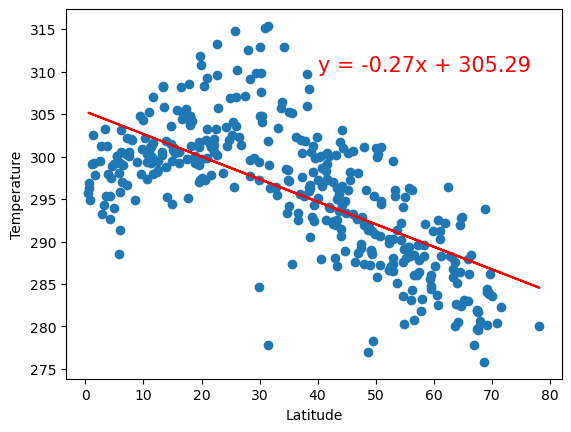

In [21]:
# Linear regression on Northern Hemisphere
#plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature", (40,310))

The r-value is: 0.6408260525020013


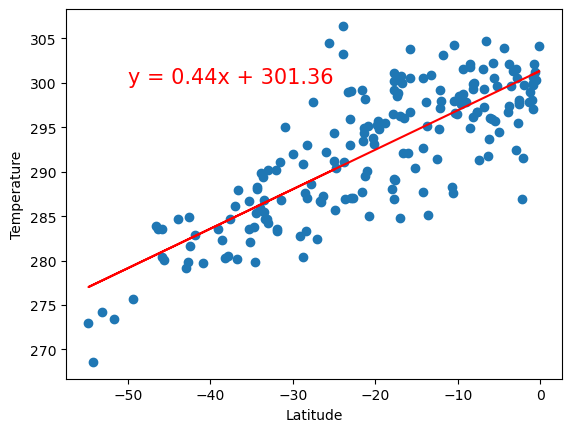

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature", (-50,300))

**Discussion about the linear relationship:** 

As the r-value in the first plot is less than .5, there is a positive correlation - however it is relatively weak.

In the second plot, latitude is a statistically significant predictor of temparatue - accounting for 64% of variance. In this case, higher latitude is a predictor of higher temparate.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0003403779281032398


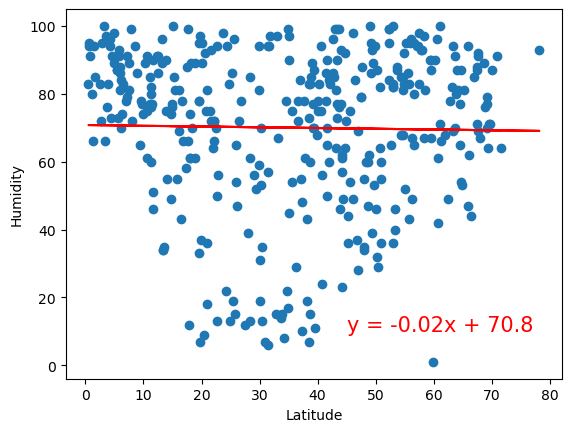

In [26]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45,10))

The r-value is: 0.020154009464665536


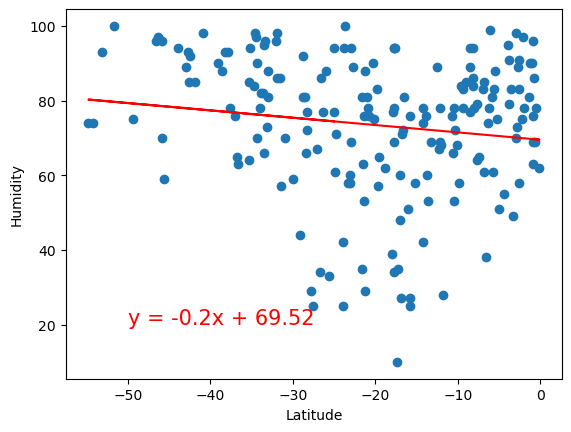

In [27]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-50,20))

**Discussion about the linear relationship:** In both hemispheres, latitude is not a good predictor of humidity. In both cases, there is no correlation between the two variables - both r-values are very close to 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.002020057570561809


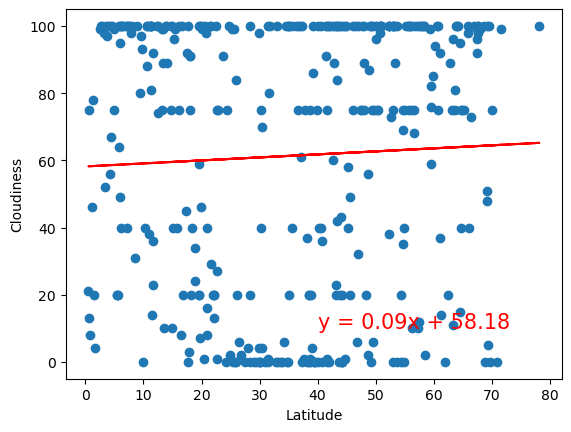

In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (40,10))

The r-value is: 0.020297334437046545


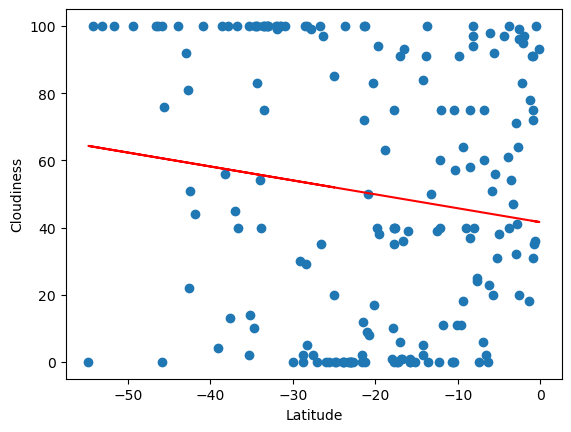

In [29]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (4,20))

**Discussion about the linear relationship:** Again, there really isn't a linear relationship - in the northern or southern hemispheres - between latitude and cloudiness. In both cases, the r-values are very close to 0.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.004440323384320925


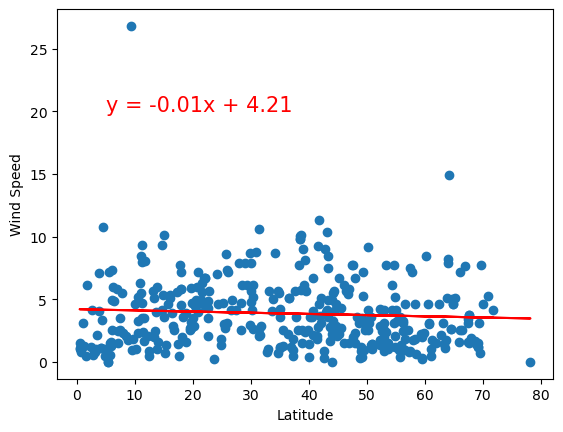

In [31]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (5,20))

The r-value is: 0.062239040700515696


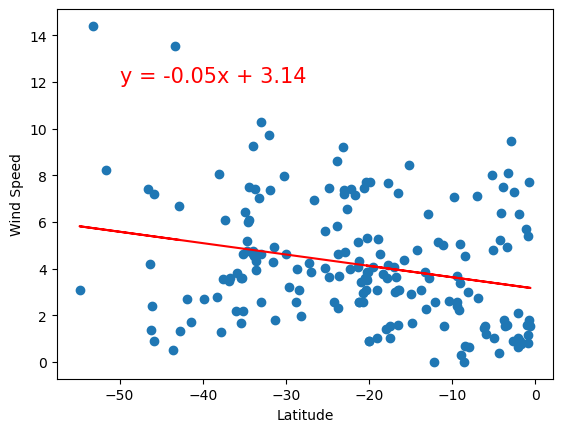

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (5,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
While visually it looks like there may be some correlation between latitude and wind speed in the northern hemisphere, the r-values show that there is no relationship between latitude and wind speed in either hemisphere. In both cases, the r-value is close to zero.